In [56]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
from plotly import tools
warnings.filterwarnings('ignore')
 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
dataset = pd.read_csv('master.csv')
worldmap=pd.read_csv("concap.csv")

In [4]:
dataset.head()

country  year  ... gdp_per_capita ($)       generation
0  Albania  1987  ...                796     Generation X
1  Albania  1987  ...                796           Silent
2  Albania  1987  ...                796     Generation X
3  Albania  1987  ...                796  G.I. Generation
4  Albania  1987  ...                796          Boomers

[5 rows x 12 columns]

In [5]:
# List of Countries in the Dataset
unique_country = dataset['country'].unique()
print(unique_country)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

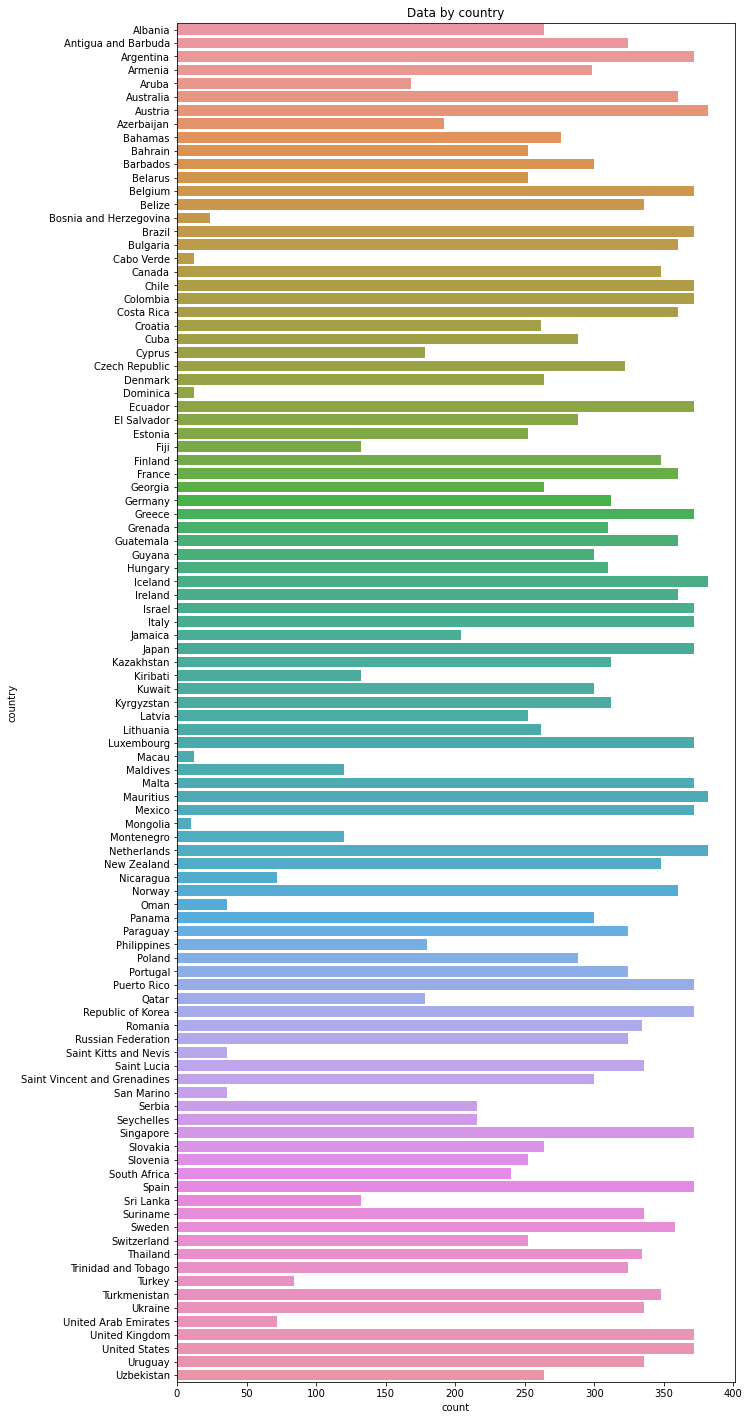

In [6]:
###Let's check for country
alpha = 1.0
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=dataset, alpha=alpha)
plt.title('Data by country')
plt.show()

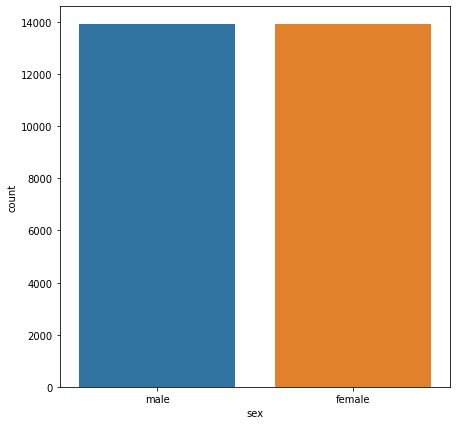

In [7]:
# Between Genders Male vs Female
plt.figure(figsize=(7,7))
sex = sns.countplot(x='sex',data = dataset)

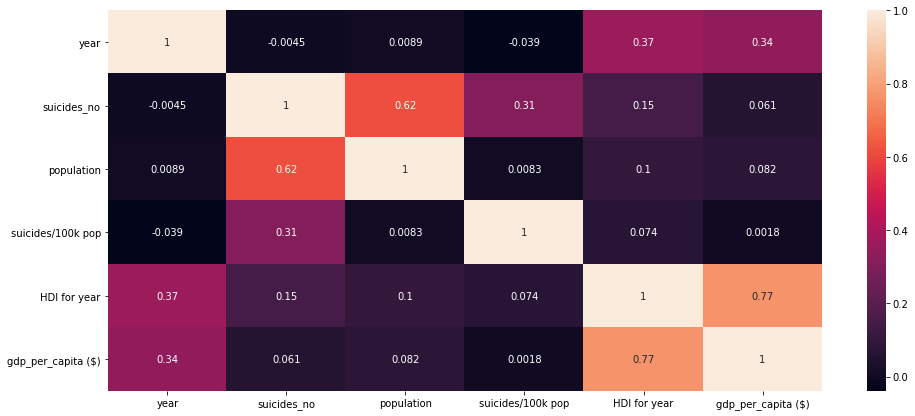

In [8]:
# Corelation between the Data
plt.figure(figsize=(16,7))
cor = sns.heatmap(dataset.corr(), annot = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



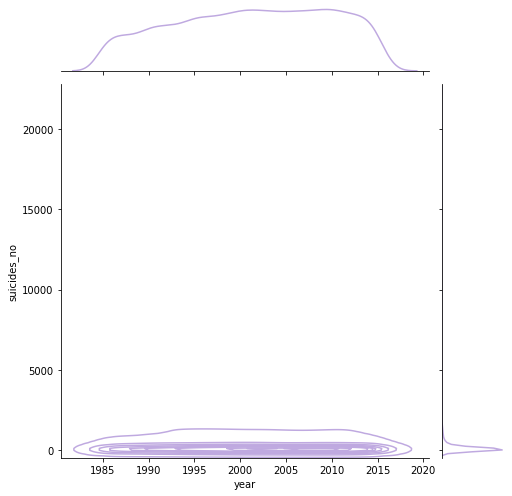

In [9]:
g = sns.jointplot(dataset.year,dataset.suicides_no, kind="kde", color="#bfa9e0" ,size=7)
plt.savefig('graph.png')

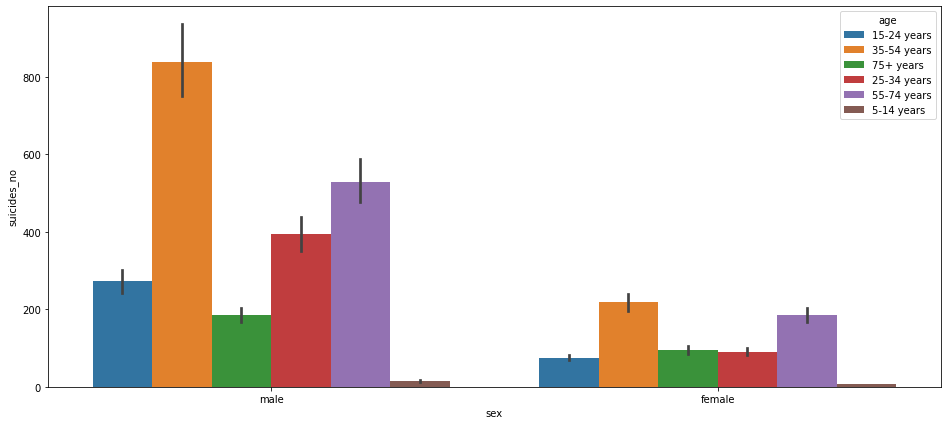

In [10]:
# Visualizing which age of people Suicide the most
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = dataset)

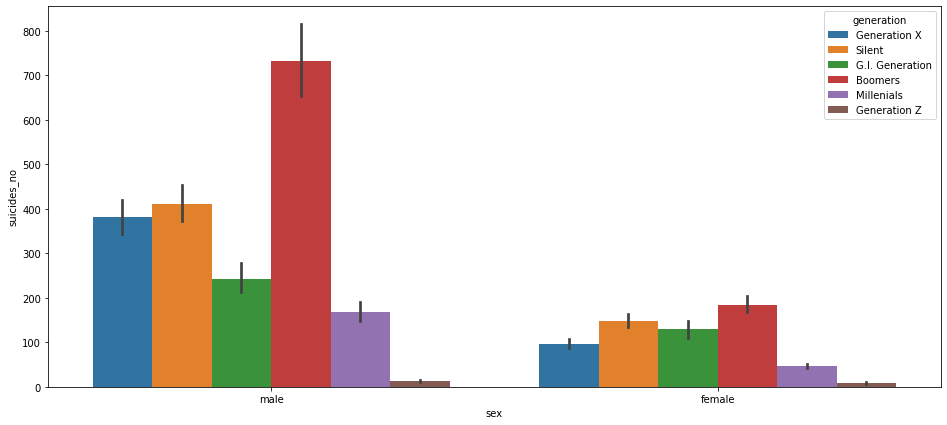

In [11]:
# Visualizing which Generation of people Suicide the most
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = dataset)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



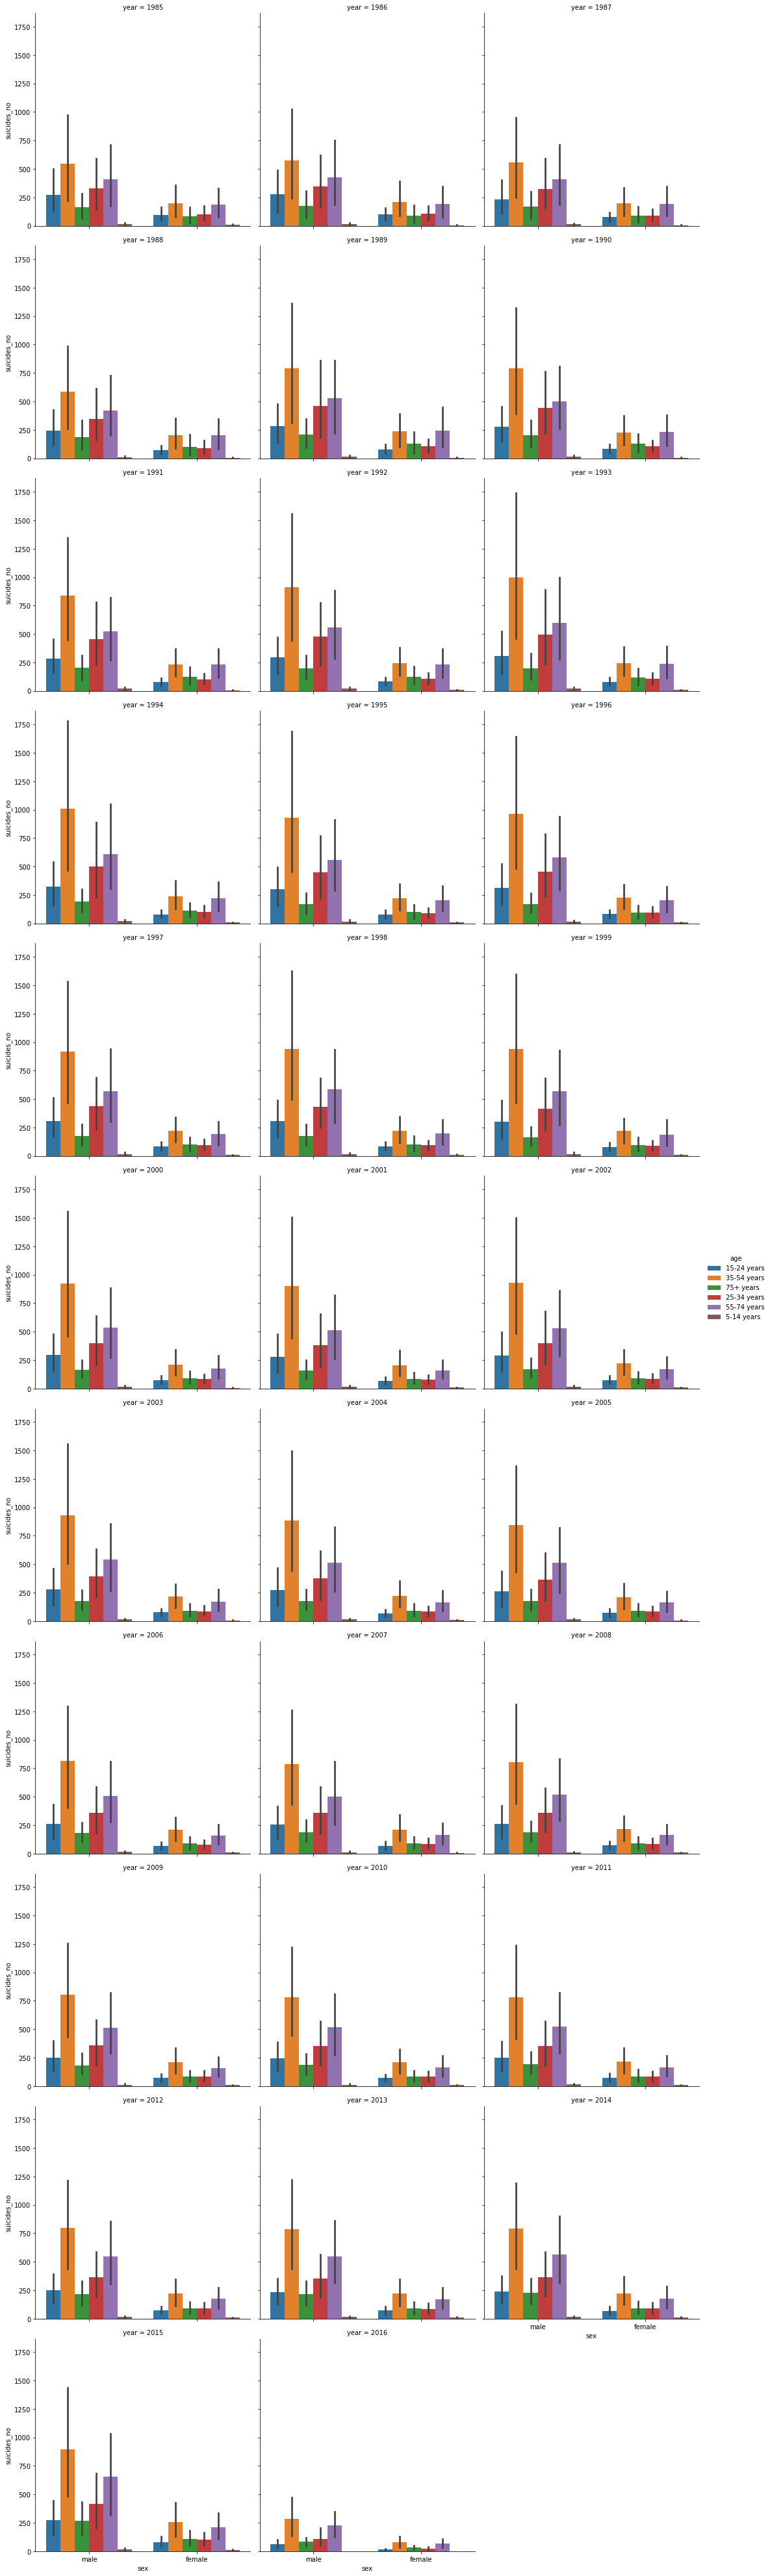

In [12]:
cat_accord_year = sns.catplot('sex','suicides_no',hue='age',col='year',data=dataset,kind='bar',col_wrap=3)

In [13]:
# Finding the year with the highest suicide
df = dataset.reset_index()
df = df.drop(["index"], axis=1)
max_suicide_year = df["year"][0]
max_suicide_year 

1987

In [14]:
data = dataset[(dataset['year']== max_suicide_year)]
data_as_99 = data.groupby(["age","sex"]).sum()["suicides_no"].reset_index()
data_as_99

age     sex  suicides_no
0   15-24 years  female         4046
1   15-24 years    male        12386
2   25-34 years  female         4923
3   25-34 years    male        17386
4   35-54 years  female        10551
5   35-54 years    male        30098
6    5-14 years  female          271
7    5-14 years    male          664
8   55-74 years  female        10373
9   55-74 years    male        22096
10    75+ years  female         4842
11    75+ years    male         9206

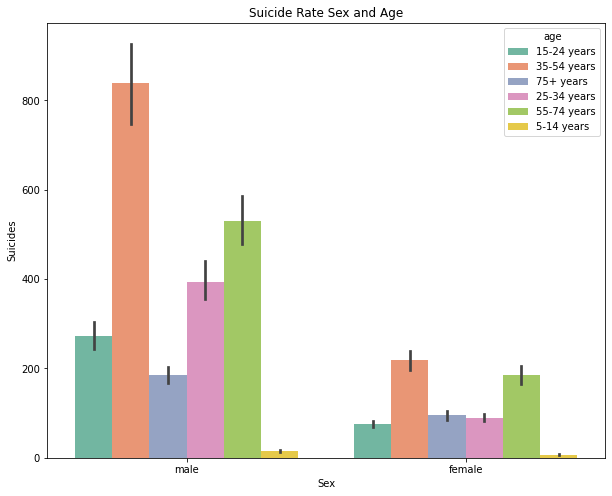

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=dataset["sex"], y=dataset["suicides_no"],hue=dataset["age"], palette=sns.color_palette("Set2"))
plt.xlabel('Sex')
plt.ylabel('Suicides')
plt.title('Suicide Rate Sex and Age')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



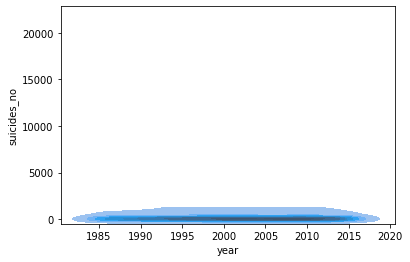

In [17]:
sns.kdeplot(dataset.year, dataset.suicides_no, shade=True, cut=3)
plt.show()

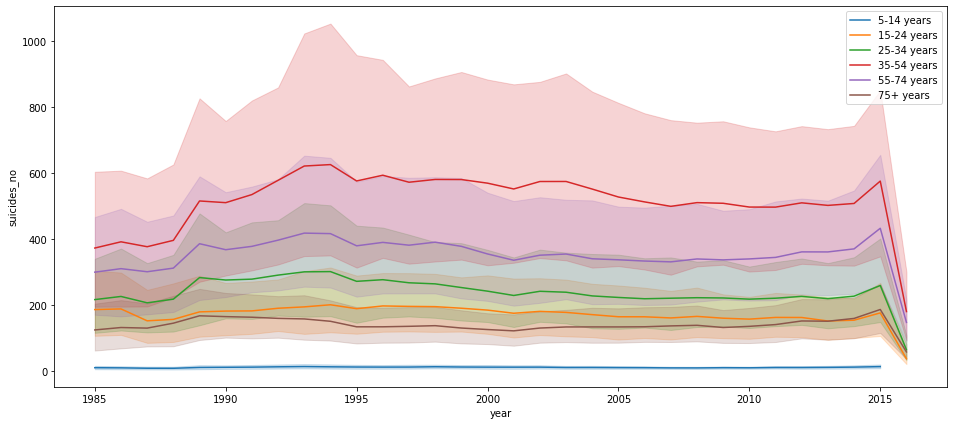

In [18]:
#Visualizing the lineplot to see Suicides numbers according to year with age group
age_5 = dataset.loc[dataset.loc[:, 'age']=='5-14 years',:]
age_15 = dataset.loc[dataset.loc[:, 'age']=='15-24 years',:]
age_25 = dataset.loc[dataset.loc[:, 'age']=='25-34 years',:]
age_35 = dataset.loc[dataset.loc[:, 'age']=='35-54 years',:]
age_55 = dataset.loc[dataset.loc[:, 'age']=='55-74 years',:]
age_75 = dataset.loc[dataset.loc[:, 'age']=='75+ years',:]
plt.figure(figsize=(16,7))
#Now lets plot a line plot
age_5_lp = sns.lineplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.lineplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.lineplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.lineplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.lineplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.lineplot(x='year', y='suicides_no', data=age_75)

#Now make the legend
leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

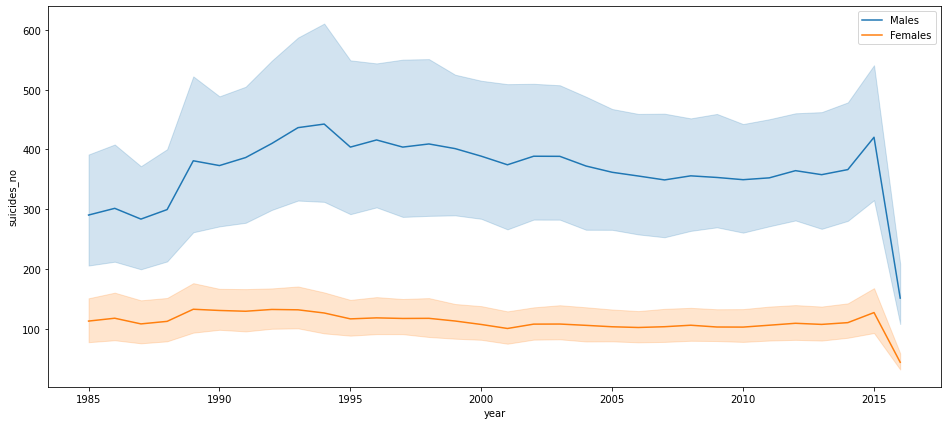

In [19]:
#Visualizing a lineplot for a Male & Female population
male_population = dataset.loc[dataset.loc[:, 'sex']=='male',:]
female_population = dataset.loc[dataset.loc[:, 'sex']=='female',:]

# Set figure size
plt.figure(figsize=(16,7))

#Plot the Lineplot
lp_male = sns.lineplot(x = 'year' , y = 'suicides_no' , data = male_population)
lp_female = sns.lineplot(x = 'year' , y = 'suicides_no' , data = female_population)
leg1 = plt.legend(['Males','Females'])

In [20]:
group_dataset=dataset.groupby(['age','sex'])['suicides_no'].sum().unstack()
group_dataset=group_dataset.reset_index().melt(id_vars='age')

In [21]:
group_dataset_female=group_dataset.iloc[:6,:]
group_dataset_male=group_dataset.iloc[6:,:]

In [22]:
group_dataset_female

age     sex   value
0  15-24 years  female  175437
1  25-34 years  female  208823
2  35-54 years  female  506233
3   5-14 years  female   16997
4  55-74 years  female  430036
5    75+ years  female  221984

In [23]:
group_dataset_male

age   sex    value
6   15-24 years  male   633105
7   25-34 years  male   915089
8   35-54 years  male  1945908
9    5-14 years  male    35267
10  55-74 years  male  1228407
11    75+ years  male   431134

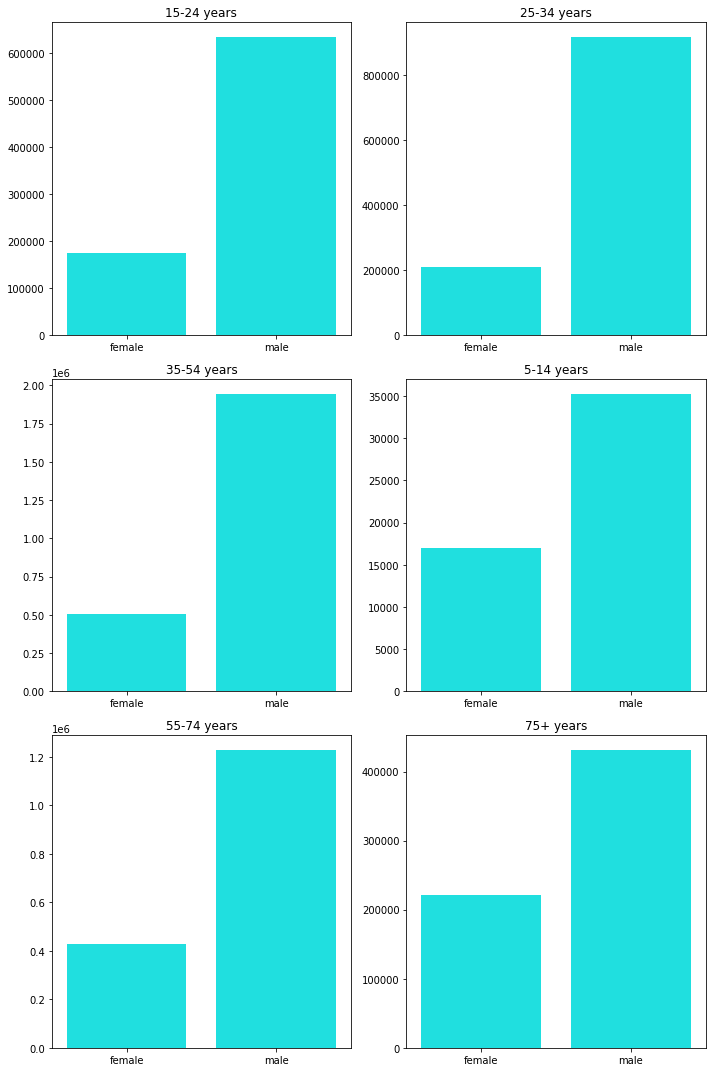

In [24]:
# Visualizing the number of Suicides at diffrent ages by males and females
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='cyan')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

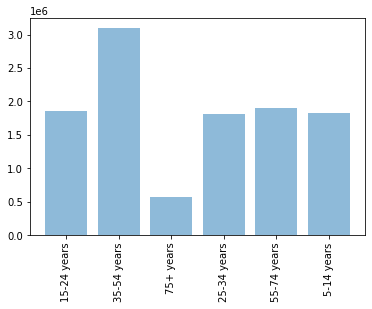

In [25]:
index_population=[]
for age in dataset['age'].unique():
  index_population.append(sum(dataset[dataset['age']==age].population)/len(dataset[dataset['age']==age].population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

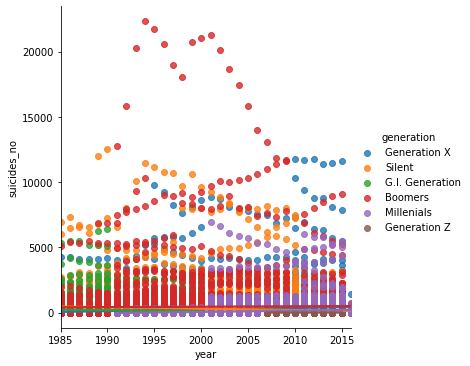

In [26]:
g = sns.lmplot(x="year", y="suicides_no", hue="generation",truncate=True, height=5, data=dataset)
# Use more informative axis labels than are provided by default
g.set_axis_labels("year", "suicides_no")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



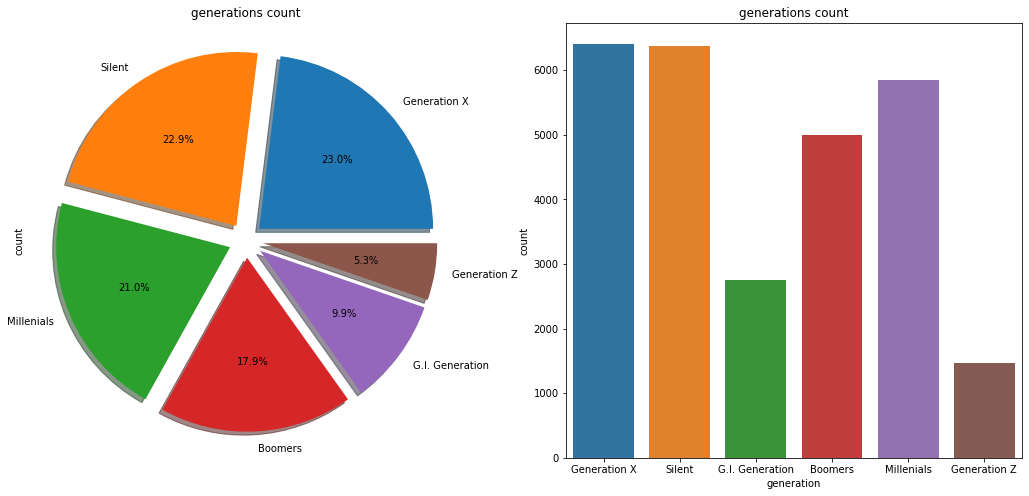

In [27]:
# Visualizing the pie chart for the Generations vs Suicide count
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('generations count')
ax[0].set_ylabel('count')
sns.countplot('generation',data=dataset,ax=ax[1])
ax[1].set_title('generations count')
plt.show()

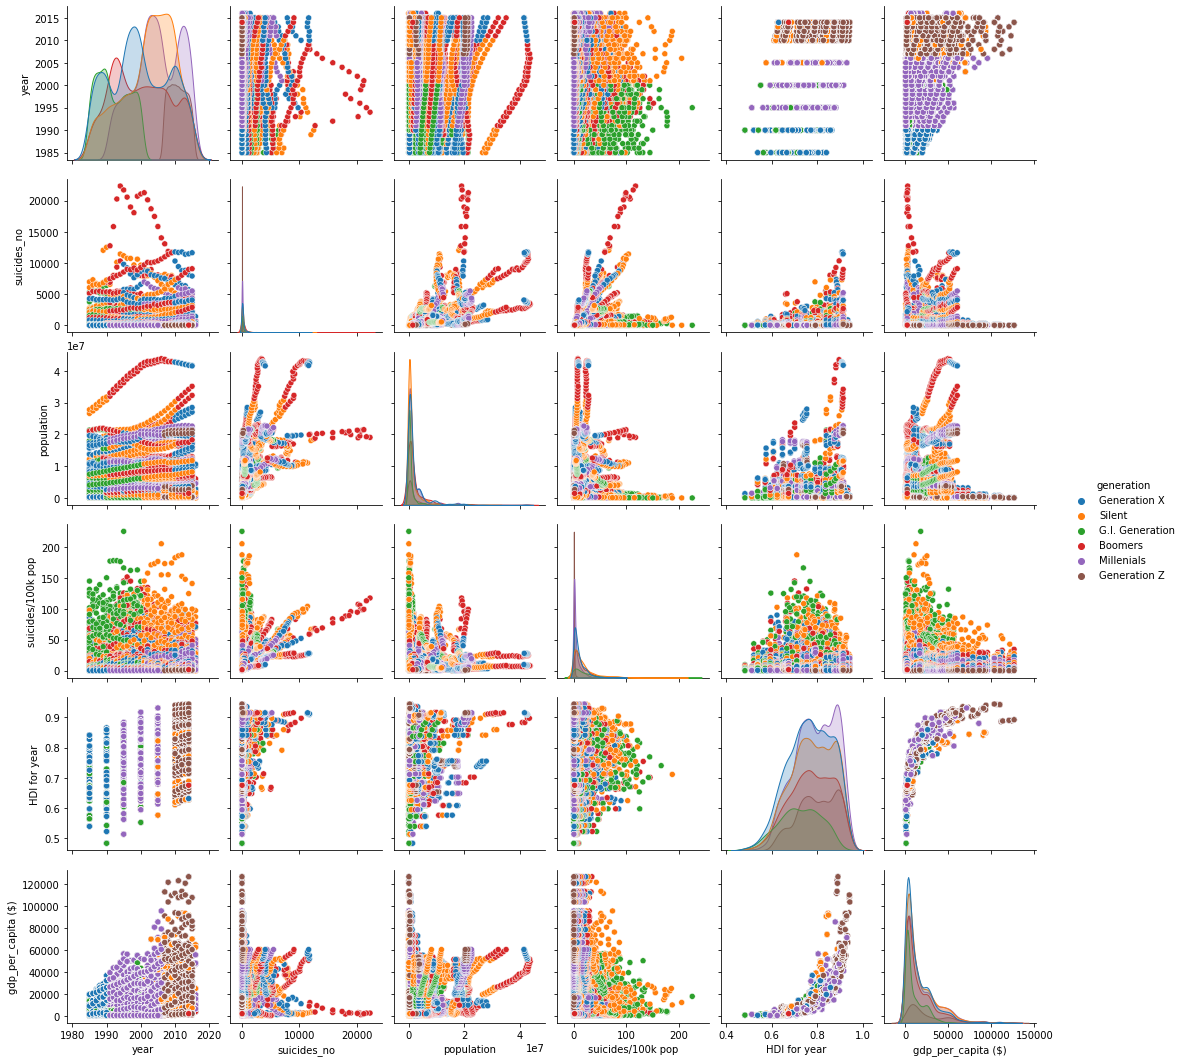

In [28]:
sns.pairplot(dataset,hue='generation')
plt.show()

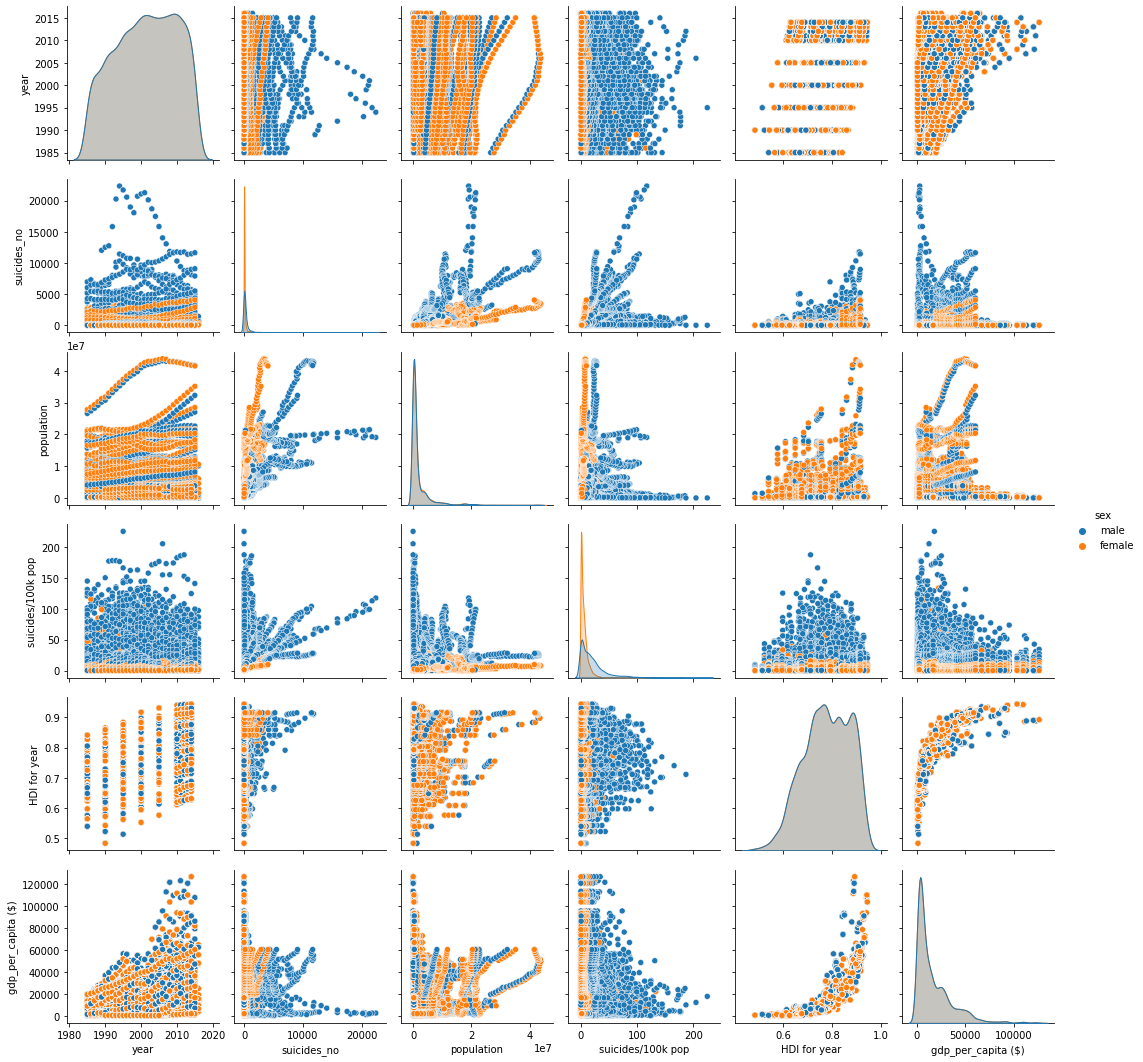

In [29]:
sns.pairplot(dataset, hue="sex")
plt.show()

In [30]:
x = dataset.iloc[:, [4, 5]].values
x

array([[     21,  312900],
       [     16,  308000],
       [     14,  289700],
       ...,
       [     60, 2762158],
       [     44, 2631600],
       [     21, 1438935]])

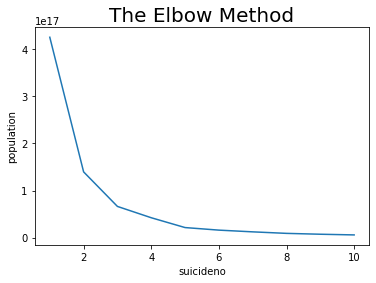

In [31]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('suicideno')
plt.ylabel('population')
plt.show()

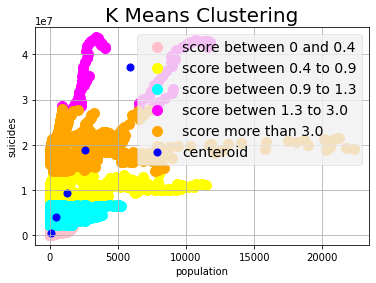

In [32]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'score between 0 and 0.4')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'score between 0.4 to 0.9')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'score between 0.9 to 1.3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'score betwen 1.3 to 3.0')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'score more than 3.0')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('population')
plt.ylabel('suicides')
plt.legend()
plt.grid()
plt.show()

In [33]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

suicides_no    population  suicides/100k pop  gdp_per_capita ($)
count   648.000000  6.480000e+02         648.000000          648.000000
mean    195.743827  1.689861e+06          11.644213         8712.592593
std     628.964252  3.580632e+06          16.919688         7488.859080
min       0.000000  5.000000e+02           0.000000          796.000000
25%       1.000000  4.544750e+04           0.470000         2073.000000
50%      16.500000  3.220000e+05           5.670000         5556.000000
75%     116.250000  1.272276e+06          16.087500        13996.000000
max    6688.000000  2.935900e+07         131.870000        24654.000000

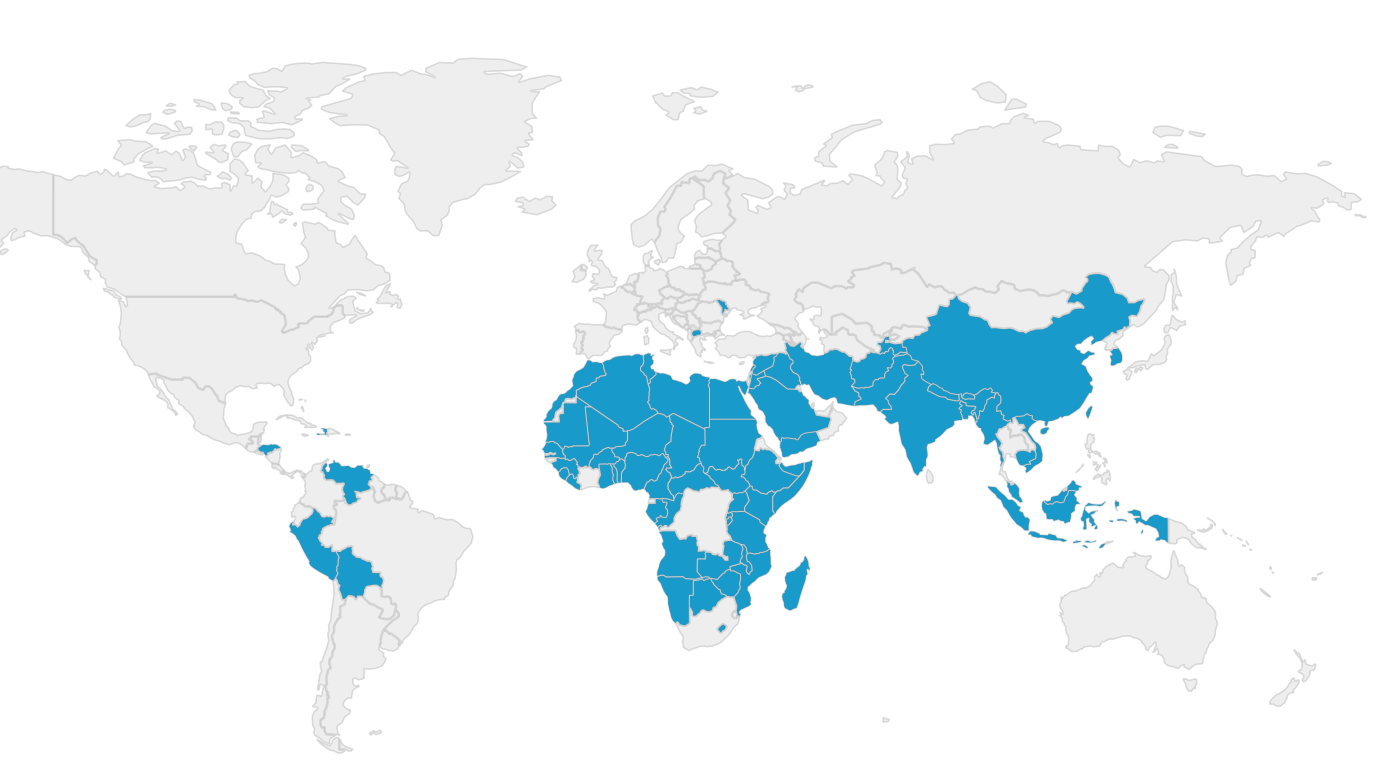

In [34]:
from IPython.display import Image
Image('missed countries.png')

In [35]:
worldmap.head()

CountryName  ... ContinentName
0                                Somaliland  ...        Africa
1  South Georgia and South Sandwich Islands  ...    Antarctica
2       French Southern and Antarctic Lands  ...    Antarctica
3                                 Palestine  ...          Asia
4                             Aland Islands  ...        Europe

[5 rows x 6 columns]

In [39]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum())

In [40]:
def reg(x):
    if x=='Russia':
        res = 'Russian Federation'
    else:
        res=x
    return res
worldmap['CountryName'] = worldmap['CountryName'].apply(reg)

data_full = pd.merge(worldmap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_sum,left_on='CountryName',right_on='country')


In [41]:
from mpl_toolkits.basemap import Basemap

In [53]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (180 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [1]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702131 sha256=ccfab7264cacafaceeee761fd6430f42f7881fe5264fbea9561adcaa7ed503fb
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.0.post1
    Uninstalling pyproj-3.0.0.post1:
      Successfully uninstalled pyproj-3.0.0.post1


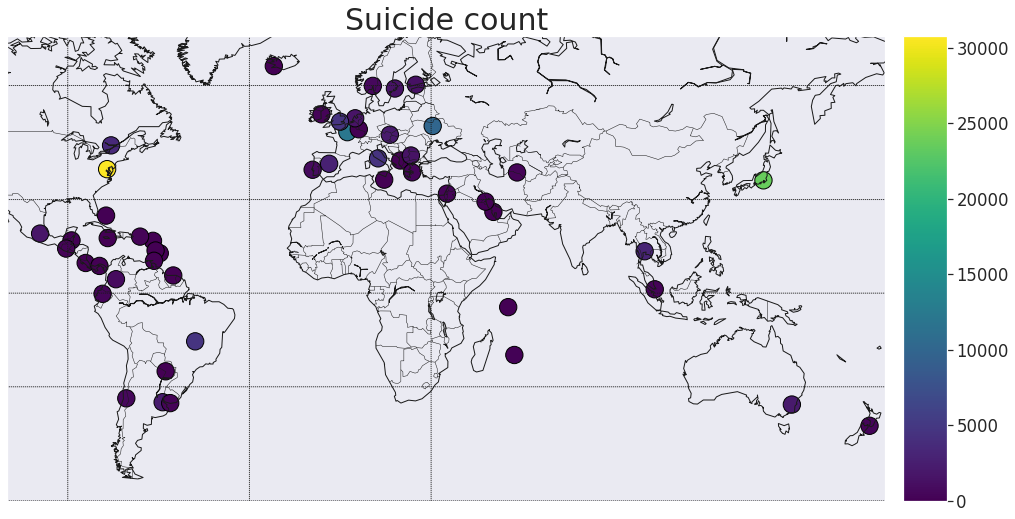

In [42]:
def mapWorld(col1,size2,title3,label4,metr=100,colmap='hot'):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col1].values
    if size2:
        a_2 = data_full[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,linewidth=1,edgecolors='black',cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.show()
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='suicides_no', size2=False,title3='Suicide count',label4='',metr=300,colmap='viridis')

Comparing with GDP

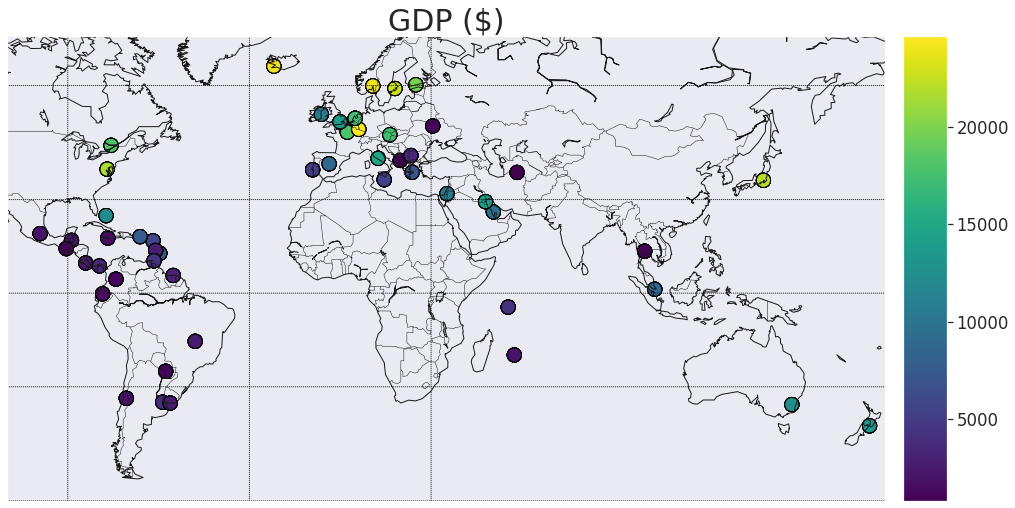

In [44]:
data_full = pd.merge(worldmap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='gdp_per_capita ($)', size2=False,title3='GDP ($)',label4='',metr=200,colmap='viridis')

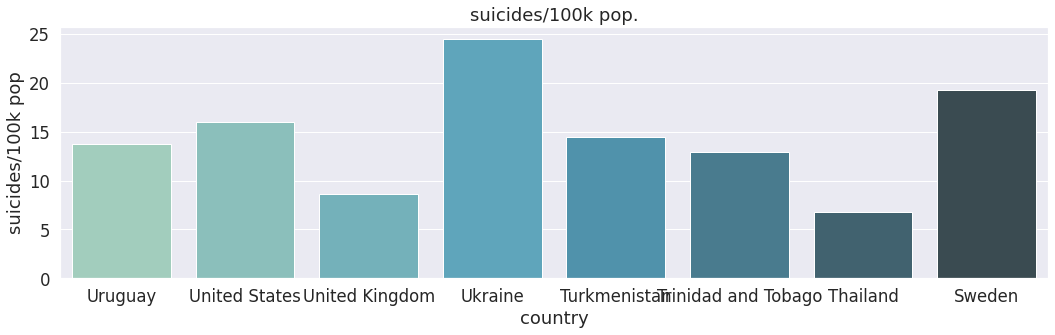

In [48]:
suic_mean = pd.DataFrame(data['suicides/100k pop'].groupby(data['country']).mean())
suic_mean = suic_mean.reset_index()
suic_mean_most = suic_mean.sort_index(ascending=False).head(8)

fig = plt.figure(figsize=(15,5))
plt.title('suicides/100k pop.')
#sns.set(font_scale=1.5)
sns.barplot(y='suicides/100k pop',x='country',data=suic_mean_most,palette="GnBu_d");
plt.ylabel('suicides/100k pop')
plt.tight_layout()

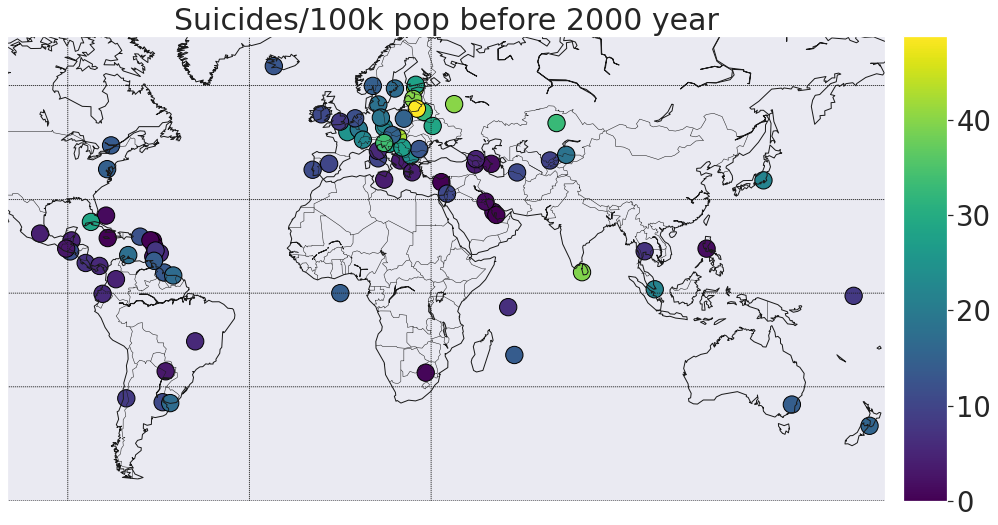

In [65]:
data_past = dataset[dataset['year']<2000]
suic_mean = pd.DataFrame(data_past['suicides/100k pop'].groupby(data_past['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(worldmap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_mean,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False,title3='Suicides/100k pop before 2000 year',label4='',metr=300,colmap='viridis')

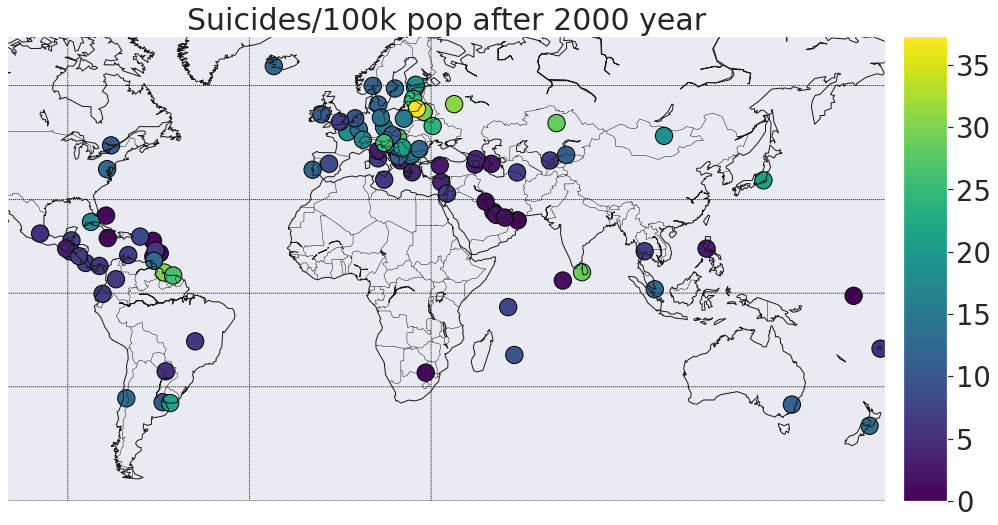

In [67]:
data_last = dataset[dataset['year'] > 2000]
suic_mean = pd.DataFrame(data_last['suicides/100k pop'].groupby(data_last['country']).mean())
suic_mean = suic_mean.reset_index()
data_full = pd.merge(worldmap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         suic_mean,left_on='CountryName',right_on='country')
plt.figure(figsize=(15,15))
mapWorld(col1='suicides/100k pop', size2=False,title3='Suicides/100k pop after 2000 year',label4='',metr=300,colmap='viridis')

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


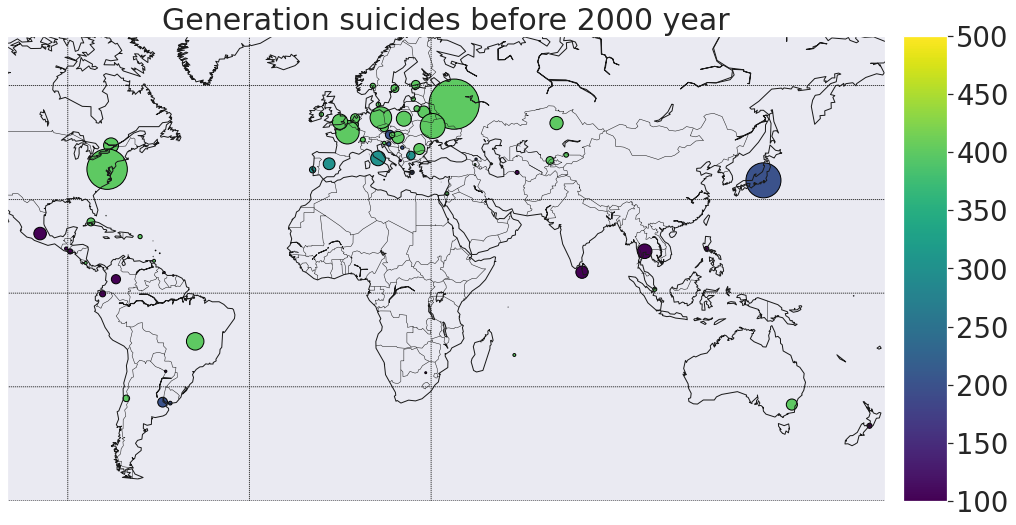

In [64]:
data_new = dataset[dataset['year']<2000]
title_map = 'Generation suicides before 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'],data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['suicides_no','country'],right_on=['suicides_no','country'])

data_full = pd.merge(worldmap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='country')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.generation = data_full.generation.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map,label4='',metr=0.01,colmap='viridis')

 Generation X:100 
 Silent:200 
 G.I. Generation:300 
 Boomers:400 
 Millenials:500 
 Generation Z:600


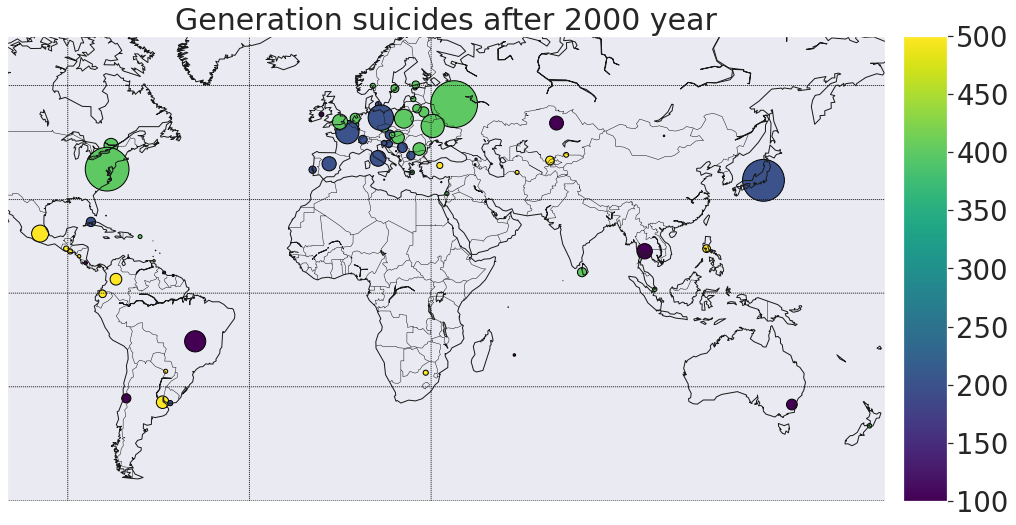

In [63]:
data_new = dataset[dataset['year']>=2000]
title_map = 'Generation suicides after 2000 year'
data_gener = pd.DataFrame(data_new['suicides_no'].groupby([data_new['generation'],data_new['country']]).sum()).reset_index()
age_max = pd.DataFrame(data_gener['suicides_no'].groupby(data_gener['country']).max()).reset_index()
gen_full = pd.merge(age_max,data_gener,left_on=['suicides_no','country'],right_on=['suicides_no','country'])

data_full = pd.merge(worldmap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         gen_full,left_on='CountryName',right_on='country')
data_full.dropna(inplace=True)

def gener(x):
    dic_t = {'Generation X':100,'Silent':200,'G.I. Generation':300,'Boomers':400,'Millenials':500,'Generation Z':600}
    return dic_t[x]
data_full.generation = data_full.generation.apply(gener)
print(" Generation X:100 \n Silent:200 \n G.I. Generation:300 \n Boomers:400 \n Millenials:500 \n Generation Z:600")
plt.figure(figsize=(15,15))
mapWorld(col1='generation', size2='suicides_no', title3=title_map,label4='',metr=0.01,colmap='viridis')